#### calculate concordance

In [1]:
import pandas as pd
import pickle
import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def getConcordance(df, threshold=-0.6):
    df['concordance'] = 0
    df.loc[(df.y_actual<=threshold) & (df.y_pred<=threshold),'concordance'] = 1
    df.loc[(df.y_actual>threshold) & (df.y_pred>threshold),'concordance'] = 1
    return sum(df.concordance==1)/len(df)

In [3]:
df_conc = pd.DataFrame()
for fname in glob.glob('../out/20.0518 L100/L100_reg_rf_boruta/model_perf/y_compr_*.pkl'):
    f = re.sub('.*_compr_','',fname)
    gene = re.sub('\.pkl','',f)
    df = pickle.load(open(fname, 'rb'))
    
    dfc = pd.DataFrame([{'gene':gene, 'concordance': getConcordance(df['te'])}])
    df_conc = pd.concat([df_conc,dfc])

In [4]:
df_conc.head()

,concordance,gene
0,1.000000,EEF2
0,0.724138,ELMO2
0,0.977011,ELOB
0,0.827586,AP2S1
0,0.942529,CDS2


[(0, 1.05),
 Text(0.5,0,'Concordance'),
 Text(0.5,1,'Concordance between actual and predicted')]

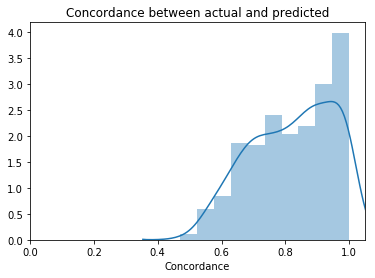

In [5]:
ax = sns.distplot(df_conc.concordance)
ax.set(xlim=[0,1.05], xlabel='Concordance',title='Concordance between actual and predicted')